# Week 1

In [1]:
import pandas as pd
import numpy as np

## Load Dataset 

In [2]:
data = pd.read_csv(r'Indian_Kids_Screen_Time.csv')

In [3]:
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


## Check Null Values

In [4]:
data.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

## Check Duplicated Values

In [5]:
data.duplicated().sum()

44

In [6]:
df = pd.DataFrame(data)
print(df)


      Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0      14    Male                      3.99     Smartphone   
1      11  Female                      4.61         Laptop   
2      18  Female                      3.73             TV   
3      15  Female                      1.21         Laptop   
4      12  Female                      5.89     Smartphone   
...   ...     ...                       ...            ...   
9707   17    Male                      3.26     Smartphone   
9708   17  Female                      4.43     Smartphone   
9709   16    Male                      5.62     Smartphone   
9710   17    Male                      5.60             TV   
9711   15  Female                      6.12             TV   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                           True                               0.42   
1                           True                               0.30   
2                           True          

## Check Correlation

In [7]:
df.corr(numeric_only=True)


,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
Age,1.000000,0.118328,0.159173,-0.488617
Avg_Daily_Screen_Time_hr,0.118328,1.000000,0.664950,-0.087552
Exceeded_Recommended_Limit,0.159173,0.664950,1.000000,-0.126643
Educational_to_Recreational_Ratio,-0.488617,-0.087552,-0.126643,1.000000


## Check Info of Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


## Check Datatype of columns

In [9]:
data.dtypes

Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

## IQR for ML Models

In [10]:
numeric_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
outlier_flags = pd.DataFrame(index=df.index)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
outlier_flags[col + '_Outlier'] = ~df[col].between(lower_bound, upper_bound)
outlier_flags['Any_Outlier'] = outlier_flags.any(axis=1)
df_outliers = df.join(outlier_flags)
print("Outlier Counts:\n", outlier_flags.sum())
print("\nSample Outliers:\n", df_outliers[df_outliers['Any_Outlier']].head(10))


Outlier Counts:
 Educational_to_Recreational_Ratio_Outlier    0
Any_Outlier                                  0
dtype: int64

Sample Outliers:
 Empty DataFrame
Columns: [Age, Gender, Avg_Daily_Screen_Time_hr, Primary_Device, Exceeded_Recommended_Limit, Educational_to_Recreational_Ratio, Health_Impacts, Urban_or_Rural, Educational_to_Recreational_Ratio_Outlier, Any_Outlier]
Index: []


In [19]:
Q1 = df['Avg_Daily_Screen_Time_hr'].quantile(0.25)
Q3 = df['Avg_Daily_Screen_Time_hr'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 1.9699999999999998


## Understanding of Week 1

## 1. Imported Dataset

Loaded the dataset with 9712 rows and 8 columns.

## 2. Checked for Missing Values

No empty values in main columns.
In Health_Impacts, 3218 rows have "None", so useful health data is limited.

## 3. Checked for Duplicates

Found 44 duplicate rows.

## 4. Checked for Duplicate Columns

No duplicate columns were found.

## 5. Correlation Check

Age has a small link with screen time (older kids use more).
Educational ratio decreases as total screen time increases.

## 6. IQR and Outliers

IQR of Avg_Daily_Screen_Time_hr = 1.97
Some kids reported very high screen time, which is not realistic.

## 7. Screen Time in Urban vs Rural

Urban: 4.38 hrs/day
Rural: 4.36 hrs/day
Little difference between the two areas.

## 8. Unique Entries in Columns

Gender: 2 (Male, Female)
Primary Device: 4 types
Urban or Rural: 2 (Urban, Rural)
Health Impacts: 16 values (some inconsistent).
Final Notes

Dataset is mostly clean.
Needs duplicate rows removed.
Health_Impacts values need fixing.
Urban and rural kids spend almost the same time on screens.

## Data Visualization (HeatMap)

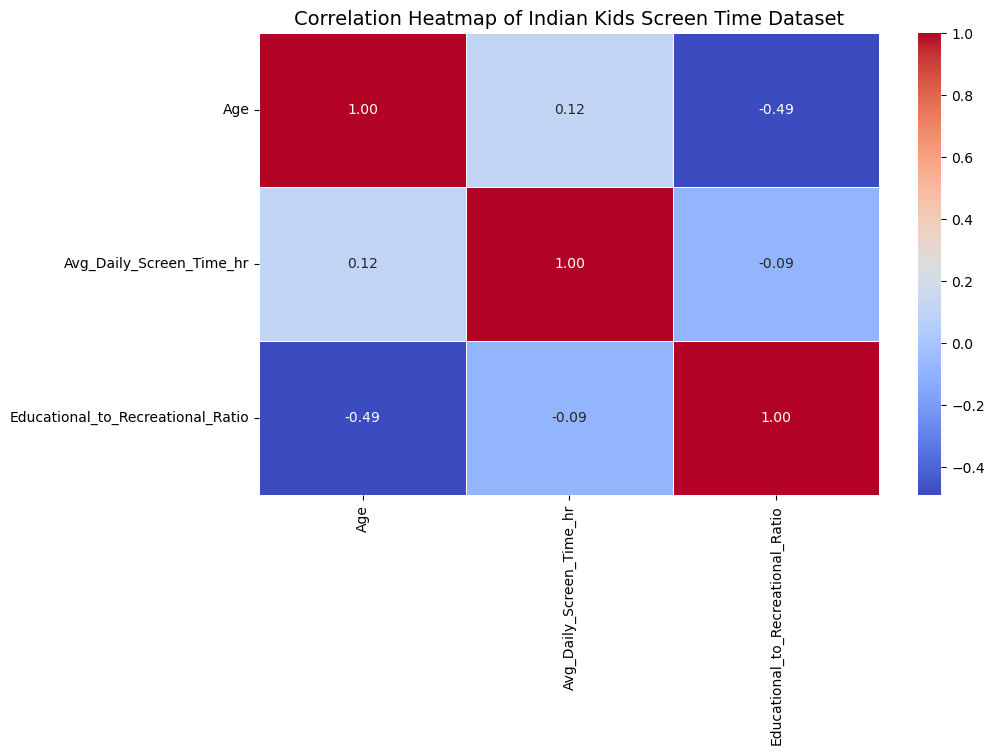

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Set up the figure
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Indian Kids Screen Time Dataset", fontsize=14)

# Show plot
plt.show()


# Week 2

## Handling Null Values

In [21]:
df = df[df['Age'] <= 18]  
df['Age_Group'] = pd.cut(df['Age'], [0, 3, 12, 18], labels=['Toddler', 'Child', 'Teen'])

print(df[['Age', 'Age_Group']].head())

   Age Age_Group
0   14      Teen
1   11     Child
2   18      Teen
3   15      Teen
4   12     Child


## Making Age Bands

In [22]:
cols = df.columns.tolist()
cols.insert(cols.index('Age') + 1, cols.pop(cols.index('Age_Group')))
df = df[cols]

print(df)

      Age Age_Group  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0      14      Teen    Male                      3.99     Smartphone   
1      11     Child  Female                      4.61         Laptop   
2      18      Teen  Female                      3.73             TV   
3      15      Teen  Female                      1.21         Laptop   
4      12     Child  Female                      5.89     Smartphone   
...   ...       ...     ...                       ...            ...   
9707   17      Teen    Male                      3.26     Smartphone   
9708   17      Teen  Female                      4.43     Smartphone   
9709   16      Teen    Male                      5.62     Smartphone   
9710   17      Teen    Male                      5.60             TV   
9711   15      Teen  Female                      6.12             TV   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                           True                               0

In [23]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Age                                  0
Age_Group                            0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
Age_Band                             0
dtype: int64


In [24]:
df.to_csv("Indian_Kids_Screen_Time_Updated.csv", index=False)

print("Dataset saved successfully!")

Dataset saved successfully!


In [25]:
df.head()

,Age,Age_Group,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band
0,14,Teen,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,14-16
1,11,Child,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,11-13
2,18,Teen,Female,3.73,TV,True,0.32,Poor Sleep,Urban,17-19
3,15,Teen,Female,1.21,Laptop,False,0.39,Poor Sleep,Urban,14-16
4,12,Child,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,11-13


Handling Null Values:

Different strategies: dropping rows/columns, mean/median/mode replacement, or forward/backward fill.

Mode is especially useful for categorical data.

Making Age Bands:

Grouping continuous age into categories.

Importance in simplifying analysis and improving model interpretability.


Mode Imputation:

Filling missing categorical values with the most frequent category of that age band.

Helps maintain dataset size and consistency.